<a href="https://colab.research.google.com/github/Gowrie02/ds-ml-projects/blob/main/irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn import datasets

In [ ]:

from zipfile import ZipFile

# Open the zip file
with ZipFile('/content/archive.zip') as myzip:
    # Read the specific file you want
    with myzip.open('Iris.csv') as f:
        iris = pd.read_csv(f)

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
irisdf=pd.DataFrame(iris )

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
for column in irisdf.columns:
    if irisdf[column].dtype != 'object': # Check if the column is numeric
        irisdf = remove_outliers(irisdf, column)

In [ ]:
print(f"Number of samples before filtering: {len(iris)}")
print(f"Number of samples after filtering: {len(irisdf)}")

Number of samples before filtering: 150
Number of samples after filtering: 146


In [ ]:
Y=irisdf['Species']

In [ ]:
x=irisdf.drop(['Species'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lable=LabelEncoder()
y=lable.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(x,y,train_size=0.8,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data_model = RandomForestRegressor()

In [ ]:
data_model.fit(train_x, train_y)

RandomForestRegressor()

In [ ]:
predict=data_model.predict(val_x)
predict

array([0.  , 0.  , 0.  , 2.  , 2.  , 1.  , 0.  , 0.  , 2.  , 0.  , 0.  ,
       1.  , 1.99, 1.  , 1.  , 1.  , 0.  , 0.99, 1.99, 0.  , 0.99, 0.  ,
       2.  , 1.  , 2.  , 0.01, 2.  , 1.  , 1.  , 2.  ])

In [ ]:
print(val_y)

[0 0 0 2 2 1 0 0 2 0 0 1 2 1 1 1 0 1 2 0 1 0 2 1 2 0 2 1 1 2]


In [ ]:
res_df=pd.DataFrame(val_y,columns=['groundtruth'])
res_df['predicted']=predict
res_df

,groundtruth,predicted
0,0,0.00
1,0,0.00
2,0,0.00
3,2,2.00
4,2,2.00
5,1,1.00
6,0,0.00
7,0,0.00
8,2,2.00
9,0,0.00


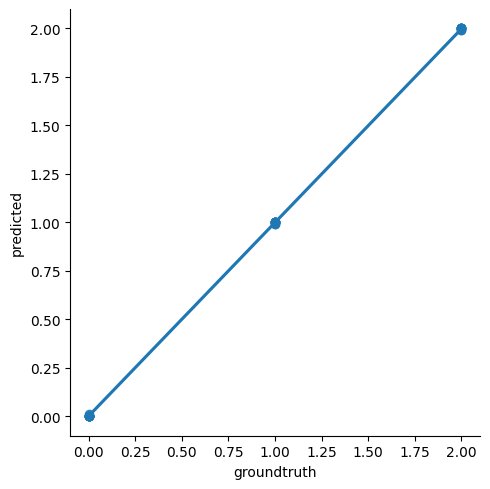

In [ ]:


sns.lmplot(x='groundtruth', y='predicted', data=res_df)

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

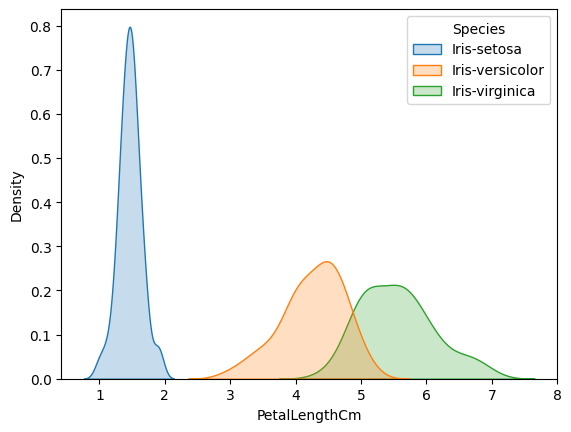

In [ ]:
sns.kdeplot(data=data,x='PetalLengthCm',hue='Species',fill=True)
#kde stands for kernel density estimate